## **K-Means Clustering with Time Series: Global Life Expectancy**

*Feb 22, 2024*

This notebook will go through an example of K-Means clustering of time series using the example of life expectancy at birth over time for all countries (data available from the [World Bank](https://data.worldbank.org/indicator/SP.DYN.LE00.IN)).

---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans

In [ ]:
# -- set plotting defaults
plt.style.use("bmh")
px.defaults.template = "ggplot2"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# -- read in the world bank data
fname = "/content/drive/Shareddrives/mlpp24/data/worldbank/API_SP.DYN.LE00.IN_DS2_en_csv_v2_820880.csv"
wbdat = pd.read_csv(fname, skiprows=4)

In [ ]:
# -- display the columns
wbdat.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')

In [ ]:
# -- set (in place) the country name as the index
wbdat.set_index("Country Name", inplace = True)

In [ ]:
wbdat

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,65.662,66.074,66.444,66.787,67.113,67.435,67.762,68.095,68.436,68.784,...,74.725000,74.87200,75.017,75.15800,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000
Afghanistan,32.446,32.962,33.471,33.971,34.463,34.948,35.430,35.914,36.403,36.900,...,59.930000,60.48400,61.028,61.55300,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000
Angola,37.524,37.811,38.113,38.430,38.760,39.102,39.454,39.813,40.178,40.546,...,53.243000,54.31100,55.350,56.33000,57.236000,58.054000,58.776000,59.398000,59.925000,60.379000
Albania,62.283,63.301,64.190,64.914,65.463,65.850,66.110,66.304,66.487,66.689,...,75.912000,76.22100,76.562,76.91400,77.252000,77.554000,77.813000,78.025000,78.194000,78.333000
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.397561,69.64878,69.900,70.14878,70.497561,70.797561,71.097561,71.346341,71.646341,71.946341
"Yemen, Rep.",29.919,30.163,30.500,30.943,31.501,32.175,32.960,33.836,34.780,35.780,...,64.892000,65.25500,65.549,65.76800,65.920000,66.016000,66.066000,66.085000,66.087000,66.086000
South Africa,48.406,48.777,49.142,49.509,49.888,50.284,50.705,51.148,51.615,52.106,...,55.360000,56.46000,57.669,58.89500,60.060000,61.099000,61.968000,62.649000,63.153000,63.538000


In [ ]:
# -- extract life expectancy time series
cols = wbdat.columns[3:-3]
wbdat = wbdat[cols]

In [ ]:
# -- convert columns to integers
wbdat.columns = wbdat.columns.astype(int)

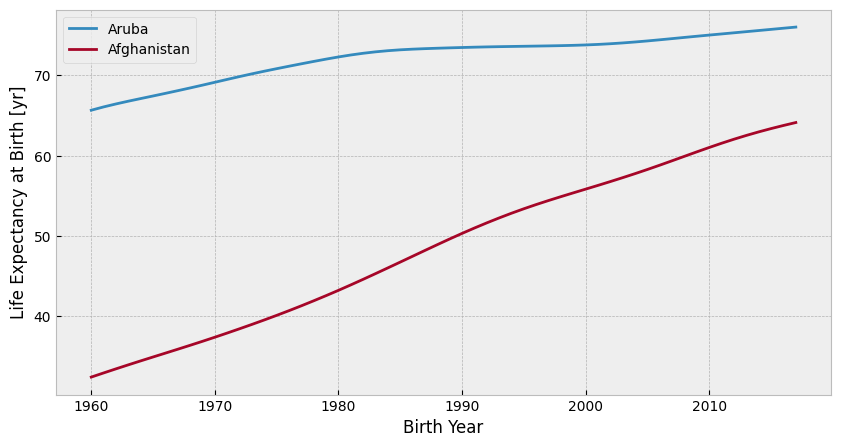

In [ ]:
# -- plot a couple of countries
ax = wbdat.iloc[0].plot(figsize=(10, 5))
ax = wbdat.iloc[1].plot(ax=ax)
ax.set_xlabel("Birth Year")
ax.set_ylabel("Life Expectancy at Birth [yr]")
ax.legend()

# -- get the figure and show it
ax.get_figure().show()

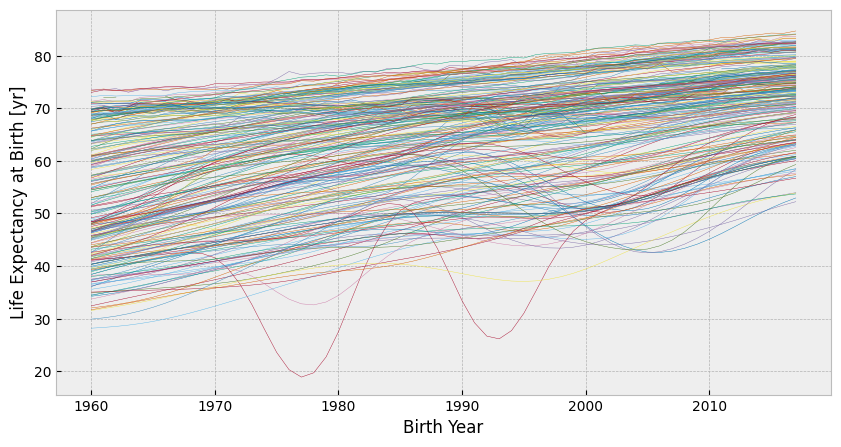

In [ ]:
# -- plot them all
ax = wbdat.T.plot(legend=False, lw=0.3, figsize=(10, 5))
ax.set_xlabel("Birth Year")
ax.set_ylabel("Life Expectancy at Birth [yr]")

# -- get the figure and show it
ax.get_figure().show()

In [ ]:
# -- plot all time series with a "heatmap"
fig = px.imshow(wbdat, color_continuous_scale="viridis", labels={"color" :"Life Expectancy in year"}, width = 1000, aspect="auto")

# -- remove the country names
fig.update_yaxes(showticklabels=False)

fig.show()

In [ ]:
# -- remove rows with NaNs in the time series
wbsub = wbdat.dropna()

In [ ]:
# -- plot all time series with a "heatmap"
fig = px.imshow(wbsub, color_continuous_scale="viridis", labels={"color" :"Life Expectancy in year"}, width = 1000, aspect="auto")

# -- remove the country names
fig.update_yaxes(showticklabels=False)

fig.show()

In [ ]:
# -- now let's cluster, but first (of course) standardize across columns to
#    cluster based on trends in the time series
wbsub_st = wbsub.sub(wbsub.mean(axis=1), axis=0).divide(wbsub.std(axis=1), axis=0)

In [ ]:
wbsub_st

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,-2.362465,-2.215279,-2.083097,-1.960561,-1.844098,-1.729064,-1.612244,-1.493280,-1.371458,-1.247136,...,0.875277,0.927793,0.979594,1.029966,1.080338,1.131067,1.181796,1.232526,1.283612,1.334341
Afghanistan,-1.641662,-1.589430,-1.537907,-1.487294,-1.437492,-1.388398,-1.339607,-1.290615,-1.241116,-1.190807,...,1.140400,1.196479,1.251545,1.304688,1.355402,1.403079,1.447719,1.489322,1.528395,1.565545
Angola,-1.446828,-1.399340,-1.349371,-1.296919,-1.242317,-1.185729,-1.127486,-1.068086,-1.007692,-0.946802,...,1.154069,1.330782,1.502697,1.664850,1.814758,1.950106,2.069570,2.172487,2.259686,2.334805
Albania,-2.220027,-1.973346,-1.757924,-1.582484,-1.449451,-1.355673,-1.292670,-1.245660,-1.201316,-1.152367,...,1.082546,1.157422,1.240053,1.325350,1.407254,1.480434,1.543195,1.594567,1.635519,1.669201
Arab World,-1.908328,-1.832836,-1.757922,-1.683200,-1.608359,-1.533915,-1.460739,-1.389467,-1.319945,-1.251408,...,1.061428,1.088769,1.113186,1.135890,1.158111,1.180761,1.203868,1.227387,1.251115,1.274729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,-1.763921,-1.705370,-1.647229,-1.589087,-1.529922,-1.469529,-1.407702,-1.344443,-1.279955,-1.213829,...,1.154615,1.206615,1.258000,1.307748,1.354834,1.398850,1.439385,1.476440,1.510219,1.541133
"Yemen, Rep.",-1.821429,-1.801364,-1.773652,-1.737224,-1.691339,-1.635915,-1.571363,-1.499328,-1.421702,-1.339470,...,1.054453,1.084303,1.108479,1.126488,1.138987,1.146881,1.150993,1.152555,1.152719,1.152637
South Africa,-1.907506,-1.825255,-1.744334,-1.662970,-1.578946,-1.491153,-1.397817,-1.299604,-1.196069,-1.087215,...,-0.365802,-0.121931,0.146104,0.417909,0.676190,0.906536,1.099194,1.250172,1.361909,1.447264


In [ ]:
# -- plot all time series with a "heatmap"
fig = px.imshow(wbsub_st, color_continuous_scale="viridis", labels={"color" :"Life Expectancy in year"}, width = 1000, aspect="auto")

# -- remove the country names
fig.update_yaxes(showticklabels=False)

fig.show()

In [ ]:
# -- define the features
feat = wbsub_st

In [ ]:
# -- cluster with 5 clusters
km = KMeans(n_clusters=5)
km.fit(feat)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=5)

In [ ]:
# -- put cluster centers into a DataFrame to plot
clusters = pd.DataFrame(data=km.cluster_centers_, columns=wbsub_st.columns)

In [ ]:
# -- plot the cluster centers
labs = {"variable":"cluster number", "value":"life expectancy at birth [yr]", "index":"birth year"}
fig = px.line(clusters.T, width=900, color_discrete_sequence=px.colors.qualitative.D3, labels=labs)
fig.show()

In [ ]:
# -- display the labels
km.labels_

array([1, 0, 4, 0, 0, 1, 0, 4, 0, 0, 0, 4, 4, 0, 0, 0, 0, 4, 1, 0, 1, 2,
       1, 0, 0, 1, 1, 0, 2, 3, 0, 4, 0, 0, 1, 1, 1, 1, 4, 4, 0, 0, 1, 1,
       1, 1, 0, 4, 0, 1, 4, 1, 0, 1, 0, 1, 4, 4, 0, 0, 0, 0, 0, 2, 4, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4,
       0, 0, 4, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 1, 0,
       0, 0, 1, 0, 0, 0, 4, 1, 1, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0, 2, 0, 0,
       4, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 4, 1, 0, 4, 1, 0, 3, 0, 0,
       4, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 4, 4, 0, 1, 0, 0, 1, 0,
       0, 1, 4, 2, 2, 0, 1, 4, 0, 0, 1, 4, 0, 0, 4, 0, 4, 1, 4, 1, 4, 4,
       0, 3, 1, 1, 1, 4, 1, 1, 4, 1, 0, 0, 0, 1, 0, 4, 0, 1, 0, 4, 2, 2,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 3, 2, 3], dtype=int32)

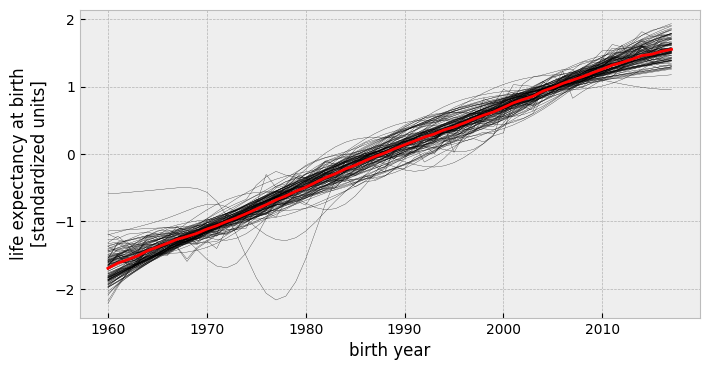

member countries  ['Afghanistan' 'Albania' 'Arab World' 'Argentina' 'Antigua and Barbuda'
 'Australia' 'Austria' 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh'
 'Bahamas, The' 'Bolivia' 'Brazil' 'Bhutan' 'Canada' 'Switzerland'
 'Channel Islands' 'Colombia' 'Comoros' 'Cyprus' 'Germany' 'Algeria'
 'Early-demographic dividend' 'Ecuador' 'Egypt, Arab Rep.' 'Euro area'
 'Eritrea' 'Spain' 'European Union'
 'Fragile and conflict affected situations' 'Finland' 'France'
 'United Kingdom' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Equatorial Guinea'
 'Greece' 'Grenada' 'Guatemala' 'Guam' 'High income'
 'Hong Kong SAR, China' 'Honduras' 'Croatia' 'Haiti' 'IDA total'
 'Indonesia' 'IDA only' 'India' 'Ireland' 'Iran, Islamic Rep.' 'Iceland'
 'Italy' 'Cambodia' 'Kiribati' 'Korea, Rep.'
 'Latin America & Caribbean (excluding high income)' 'Lao PDR' 'Lebanon'
 'Latin America & Caribbean'
 'Least developed countries: UN classification' 'Low income' 'Sri Lanka'
 'Lower middle income' 'Luxembourg' 'Macao SAR, China

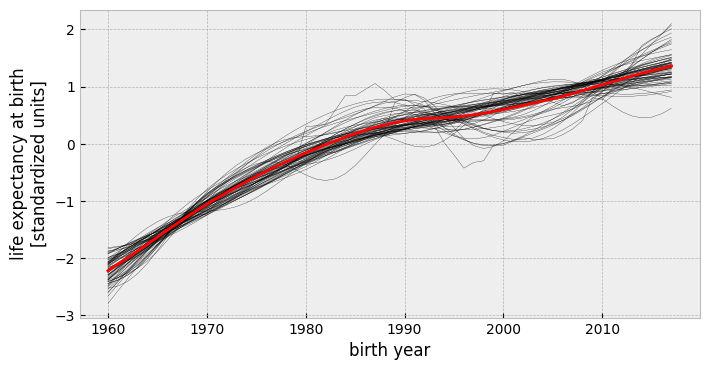

member countries  ['Aruba' 'United Arab Emirates' 'Bahrain' 'Bosnia and Herzegovina'
 'Belize' 'Barbados' 'Brunei Darussalam' 'Chile' 'China' "Cote d'Ivoire"
 'Cameroon' 'Cabo Verde' 'Costa Rica' 'Caribbean small states' 'Cuba'
 'Djibouti' 'Dominican Republic'
 'East Asia & Pacific (excluding high income)' 'East Asia & Pacific'
 'Fiji' 'Micronesia, Fed. Sts.' 'Gabon' 'Georgia' 'Gambia, The'
 'IBRD only' 'IDA & IBRD total' 'IDA blend' 'Iraq' 'Jamaica' 'Jordan'
 'Japan' 'Kazakhstan' 'Kyrgyz Republic' 'Kuwait' 'Libya' 'St. Lucia'
 'Low & middle income' 'Late-demographic dividend' 'Mexico'
 'Middle income' 'North Macedonia' 'Montenegro' 'Mauritania' 'Malaysia'
 'Oman' 'Other small states' 'Pakistan' 'Panama' 'Papua New Guinea'
 'Korea, Dem. People’s Rep.' 'Pacific island small states' 'Qatar'
 'Saudi Arabia' 'Solomon Islands' 'Small states' 'Suriname'
 'Syrian Arab Republic' 'Chad'
 'East Asia & Pacific (IDA & IBRD countries)' 'Togo' 'Thailand'
 'Turkmenistan' 'Tonga' 'Tunisia' 'Upper midd

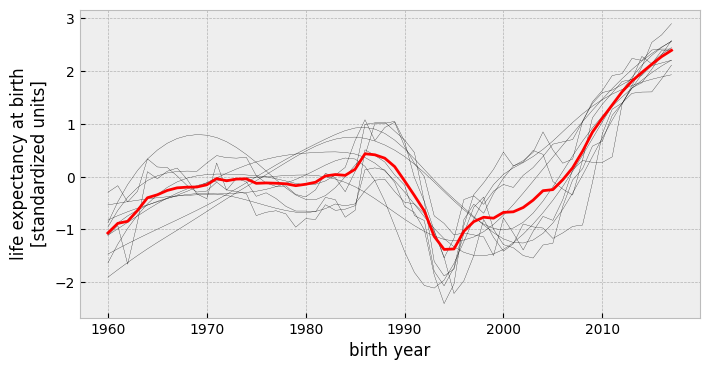

member countries  ['Belarus' 'Botswana' 'Estonia' 'Kenya' 'Lithuania' 'Latvia'
 'Russian Federation' 'Rwanda' 'Uganda' 'Ukraine' 'Zambia']





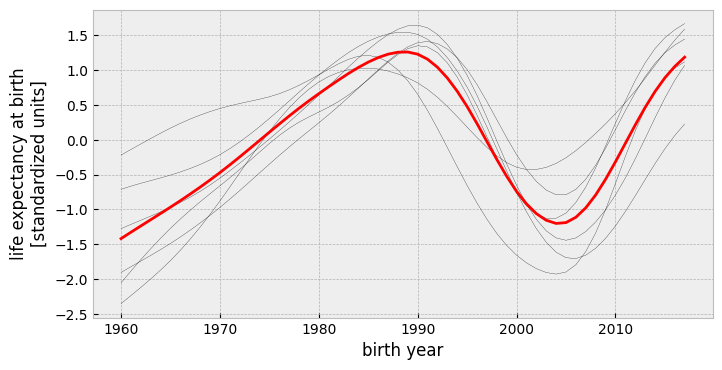

member countries  ['Central African Republic' 'Lesotho' 'Namibia' 'Eswatini' 'South Africa'
 'Zimbabwe']





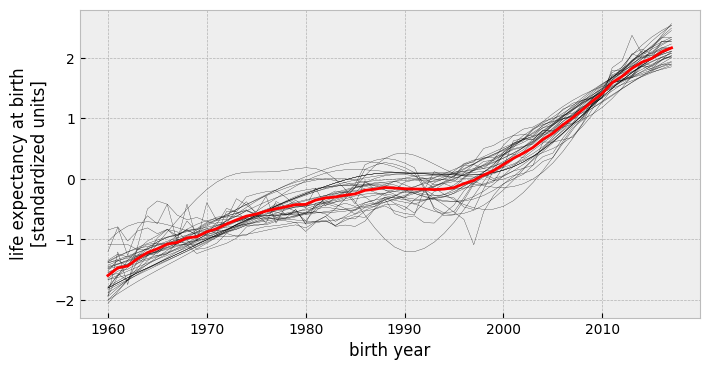

member countries  ['Angola' 'Armenia' 'Azerbaijan' 'Burundi' 'Bulgaria'
 'Central Europe and the Baltics' 'Congo, Dem. Rep.' 'Congo, Rep.'
 'Czech Republic' 'Denmark'
 'Europe & Central Asia (excluding high income)' 'Europe & Central Asia'
 'Ethiopia' 'Guyana' 'Heavily indebted poor countries (HIPC)' 'Hungary'
 'Liberia' 'Moldova' 'Mozambique' 'Malawi' 'Nigeria' 'Poland'
 'Pre-demographic dividend' 'Romania' 'Sudan' 'Sierra Leone'
 'Sub-Saharan Africa (excluding high income)' 'Sub-Saharan Africa'
 'Sao Tome and Principe' 'Slovak Republic' 'Slovenia'
 'Europe & Central Asia (IDA & IBRD countries)' 'Tajikistan'
 'Sub-Saharan Africa (IDA & IBRD countries)' 'Tanzania']





In [ ]:
# -- now let's plot all cluster centers, their members, and print their member names

for cnum in range(km.n_clusters):

  # -- True/False index of where labels_ is cnum
  ind = km.labels_ == cnum

  # -- get the members of that cluster number
  mems = wbsub_st[ind]

  # -- make a plot
  ax = mems.T.plot(lw=0.2, color="k", legend=False, figsize=(8, 4))
  clusters.iloc[cnum].plot(color="r", ax=ax)
  ax.set_xlabel("birth year")
  ax.set_ylabel("life expectancy at birth\n[standardized units]")

  # -- refresh screen
  plt.pause(0.01)

  # -- print member countries and extra space
  print("member countries ", mems.index.values)
  print("\n\n")
